In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

In [2]:
from scipy.optimize import fsolve


def obj_func(p, par1, par2):
     (x1, y1, x2, y2, m) = p

     eqn1 = np.polyval(par1, x1) - y1
     eqn2 = np.polyval(par2, x2) - y2
     eqn3 = 2*par1[0] * x1 + par1[1] - m
     eqn4 = 2*par2[0] * x2 + par2[1] - m
     eqn5 = m * (x1 - x2) - (y1 - y2)

     return [eqn1, eqn2, eqn3, eqn4, eqn5]

# Two Phase Curve Test

In [3]:
par1 = [1, 0, 3]
par2 = [1, -3, 6]

print(fsolve(obj_func, [2, 3, 4, 5, 6], args = (par1, par2)))


[0.25   3.0625 1.75   3.8125 0.5   ]


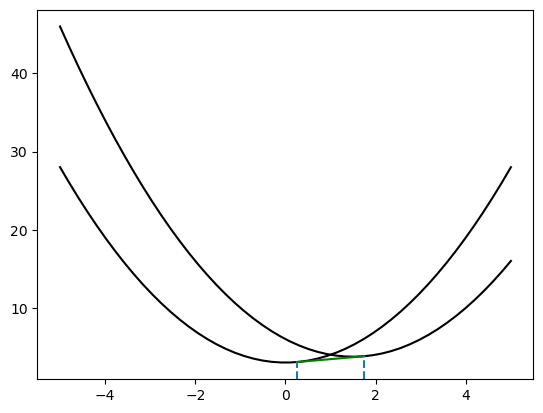

In [4]:
[x1, y1, x2, y2, m] = fsolve(obj_func, [2, 3, 4, 5, 6], args = (par1, par2))

xs = np.linspace(-5, 5)
y1s = np.polyval(par1, xs)
y2s = np.polyval(par2, xs)


b = y1 - m * x1

if x1 > x2:
    line_bounds = np.linspace(x2, x1)
else:
    line_bounds = np.linspace(x1, x2)

tangent = line_bounds * m + b



plt.plot(xs, y1s, '-', color= 'black')
plt.plot(xs, y2s, '-', color = 'black')
plt.plot(line_bounds, tangent, '-', color = 'green')

ylim = plt.gca().get_ylim()

dylim = ylim[1]-ylim[0]
plt.axvline(x1, ymax = 1+(y1 - ylim[1])/dylim, linestyle = '--')
plt.axvline(x2, ymax = 1+(y2 - ylim[1])/dylim,linestyle = '--')
plt.show()

In [5]:
print(-(y1 - ylim[1])/dylim)

0.9534439685466998


In [6]:
print(dylim)

47.28854643898376


In [7]:
print(ylim)

(0.860932944606414, 48.14947938359017)


In [8]:
par1 = [1, 0, 3]
par2 = [1, -3, 6]
par3 = [2, 3, 1]

import itertools


combs = list(itertools.combinations([par1, par2, par3], 2))

# Three Phase Curve Test (Exam Problem 5) 

A parabola is defined in the standard form 
$y = width * (x - shift)^2 + height$

Width is inverse, so multiplying by a smaller number yields a wider parameter.

In [9]:
def convert_standard_to_lin(pstandard):
    [height, width, shift] = pstandard
    return[width, -2 * shift * width, shift **2 * width + height]



In [10]:
def plot_G_X_diagram(curves):

    [pstandard_1, pstandard_2, pstandard_3] = curves

    combs = list(itertools.combinations(curves, 2))

    par1 = convert_standard_to_lin(pstandard_1)
    par2 = convert_standard_to_lin(pstandard_2)
    par3 = convert_standard_to_lin(pstandard_3)


    plt.ylim(-15,15)

    xs = np.linspace(-5, 5, 1000)

    

    outs = []
    optimalities = []

    for (par_a, par_b) in combs:
        #print(par_a, par_b)
        #print()

        mid_a = par_a[2]
        mid_b = par_b[2]

        x0_1 = [mid_a - 4, 0, mid_b - 4, 0, -1]
        x0_2 = [mid_a + 4, 0, mid_b + 4, 0, 1]

        pa = convert_standard_to_lin(par_a)
        pb = convert_standard_to_lin(par_b)

        previous_x1 = []
        previous_xrange = []

        bounds = [((-np.inf, -np.inf, -np.inf, -np.inf, -np.inf), (np.inf, np.inf, np.inf, np.inf, 0)), ((-np.inf, -np.inf, -np.inf, -np.inf, 0), (np.inf, np.inf, np.inf, np.inf,np.inf))]


        for jdx, start_condition in enumerate([x0_1, x0_2]):
            #print(start_condition)


            output = least_squares(obj_func, x0 = start_condition, bounds = bounds[jdx], args = (pa, pb))
            opt = (output.optimality)
            out = output.x

            #print(out)

            if opt > 1e-6:
                continue

            #print(out)

            [x1, y1, x2, y2, m] = out

            #print(x2-x1)

            lower_than_parab = True
            for parab in [par1, par2, par3]:
                if pa == parab or pb == parab:
                    #print('not this')
                    continue

                else:
                    parab_vals = np.polyval(parab, np.linspace(np.min([x1,x2]), np.max([x1,x2]), 1000))
                    b = y1 - m * x1

                    if x1 > x2:
                        x_tan = np.linspace(x2, x1, 1000)
                    else:
                        x_tan = np.linspace(x1, x2, 1000)

                    tangent = x_tan * m + b

                    diff = parab_vals - tangent

                    if np.any(diff < 0):

                        lower_than_parab = False

            if not lower_than_parab:
                continue


            if np.abs(x2 - x1) < .001 or y2 > 200 or y1 > 2000 or np.abs(m) < np.abs(3e-16):
                continue

            is_lowest = True

            for idx, prev in enumerate(outs):
                if prev is None:
                    continue
                xl_prev= np.min([prev[0], prev[2]])
                xr_prev = np.max([prev[0], prev[2]])
                yl_prev = prev[prev.tolist().index(xl_prev) + 1]

                xl = np.min([out[0], out[2]])
                xr = np.max([out[0], out[2]])
                yl = out[out.tolist().index(xl) + 1]

                if not (np.max([xl_prev, xl]) <= np.min([xr_prev, xr])):
                    continue


                else:
                    """if np.abs(xl - xl_prev) <= 0.001:
                        continue"""
                

                    if xl < xl_prev:
                        yl_test = xl_prev * out[-1] + (yl - out[-1] * xl)
                        if yl_test < yl_prev:
                            outs[idx] = None
                        else:    
                            is_lowest = False
                    else:
                        yl_prev_test = x1 * prev[-1] + (yl_prev - prev[-1] * yl_prev)
                        if yl < yl_prev_test:
                            outs[idx] = None
                        else:    
                            is_lowest = False

                    """if yl < yl_prev:
                        outs[idx] = None
                    else:    
                        is_lowest = False"""
                    
            if is_lowest:
                outs.append(out)

        #print(outs)    
        #print()
        #print("outs after combination: ", outs)

    #print("Final tangents: ", outs)

    y1s = np.polyval(par1, xs)
    y2s = np.polyval(par2, xs)
    y3s = np.polyval(par3, xs)

    plt.plot(xs, y1s, '-', color= 'green')
    plt.plot(xs, y2s, '-', color = 'orange')
    plt.plot(xs, y3s, '-', color = 'purple')
    
    for out in outs:

        if out is None:
            continue
        [x1, y1, x2, y2, m] = out

        b = y1 - m * x1

        if x1 > x2:
            x_tan = np.linspace(x2, x1)
        else:
            x_tan = np.linspace(x1, x2)

        tangent = x_tan * m + b


        ##print(y1, y2)

        plt.plot(x_tan, tangent, color = "black")
        ylim = plt.gca().get_ylim()
        dylim = ylim[1]-ylim[0]
        plt.axvline(x1, ymax = 1+(y1 - ylim[1])/dylim, linestyle = '--')
        plt.axvline(x2, ymax = 1+(y2 - ylim[1])/dylim,linestyle = '--')
        plt.xlim(0, 1)
        plt.xlabel("X2")
        plt.ylabel("G")
    return plt.gcf()

In [11]:
def wrapper(height_2, height_3):
    #Parabola 1 
    height_1= 0
    width_1 = 200
    shift_1 = .25

    p_1 = [height_1, width_1, shift_1]


    #Parabola 1 
    width_2 = 1000
    shift_2 = .25

    p_2 = [height_2, width_2, shift_2]

    #Parabola 1 
    width_3 = 225
    shift_3 = .75

    p_3 = [height_3, width_3, shift_3]

    fig = plot_G_X_diagram(curves = [p_1, p_2, p_3])

    plt.show()

In [12]:
from ipywidgets import *

%matplotlib inline

interactive_plot = interactive(wrapper, height_2 = (-15, 15., 0.01), height_3 = (-15,15, 0.01))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='height_2', max=15.0, min=-15.0, step=0.01), FloatSli…

# More General Interactive Plot (Allows changing of all parameters)

In [13]:
def wrapper_general(height_1 = 0, width_1 = 200, shift_1 = 0.3, height_2 = 0.5, width_2 = 200, shift_2 = 0.5, height_3 = 0, width_3 = 200, shift_3 = 0.7):
    #Parabola 1 
    """height_1= 0
    width_1 = 200
    shift_1 = .25"""

    p_1 = [height_1, width_1, shift_1]


    #Parabola 1 
    """width_2 = 1000
    shift_2 = .25"""

    p_2 = [height_2, width_2, shift_2]

    #Parabola 1 
    """width_3 = 225
    shift_3 = .75"""

    p_3 = [height_3, width_3, shift_3]

    fig = plot_G_X_diagram(curves = [p_1, p_2, p_3])

    plt.show()

In [14]:
interactive_plot_2 = interactive(wrapper_general,
                               height_1 = (-15, 15., 0.01),
                               width_1 = (100, 1000, 10),
                               shift_1 = (0, 1, 0.01),
                               height_2 = (-15, 15., 0.01),
                               width_2 = (100, 1000, 10),
                               shift_2 = (0, 1, 0.01),
                               height_3 = (-15,15, 0.01),
                               width_3 = (100, 1000, 10),
                               shift_3 = (0, 1, .01))
interactive_plot_2

interactive(children=(FloatSlider(value=0.0, description='height_1', max=15.0, min=-15.0, step=0.01), IntSlide…